In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

def plotGraph(dim,error,k_2,k_inf):   
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(dim, error, '-', color='red')
    plt.title("Relative Error")
    plt.xlabel('dimension')
    plt.ylabel('error')
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(dim, k_2, '-', color='red')
    plt.plot(dim, k_inf, '-', color='blue')
    plt.title("k_inf and k_2")
    plt.xlabel('dimension')
    plt.ylabel('k')
    plt.legend(['k_2', 'k_inf'])
    plt.grid()

    plt.show()
     
def k_analisys(A):
      k_2=np.linalg.cond(A,2)
      k_inf=np.linalg.cond(A,np.inf)
      return (k_2,k_inf)
  
def analysis(dim,vMtrx):
    N=dim.size
    r_err=np.zeros(N)
    k_2=np.zeros(N)
    k_inf=np.zeros(N)
    for i in range(N):
        A=vMtrx[i]
        x=np.ones(dim[i])
        b=A@x
        k_2[i]=k_analisys(A)[0]    
        k_inf[i]=k_analisys(A)[1]
        x_real=np.linalg.solve(A,b)
        r_err[i]=(np.linalg.norm((x_real-x),2) / np.linalg.norm(x_real,2))
    plotGraph(dim,r_err,k_2,k_inf)  

def vecMatricx(dim,var="rand"):
    listofv=[]
    if(var=="rand"):
        for i in range(dim.size):
            A=np.random.rand(dim[i],dim[i])
            listofv.append(A)
    elif(var=="Vand"):
        for i in range(dim.size):
            x=np.linspace(1,dim[i],dim[i])
            A=np.vander(x,dim[i])
            listofv.append(A)    
    else:
        for i in range(dim.size):
            A=scp.linalg.hilbert(dim[i])
            listofv.append(A)
    return listofv

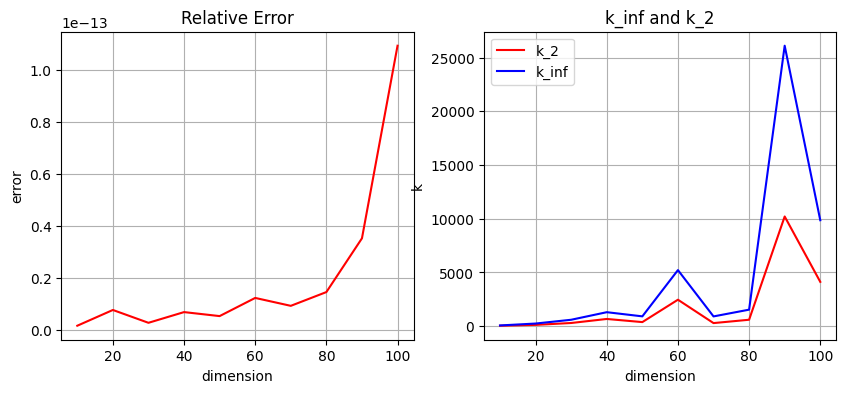

In [13]:
dim1=np.linspace(10,100,10,dtype=int)
analysis(dim1,vecMatricx(dim1,"rand"))


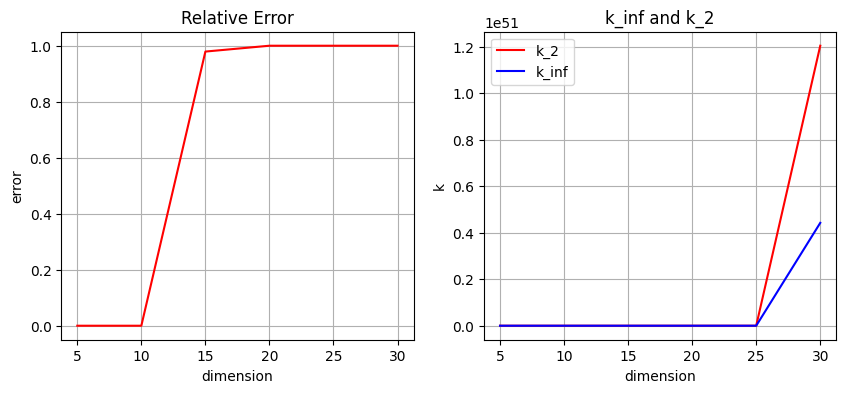

In [11]:

dim2=np.linspace(5,30,6,dtype=int)
analysis(dim2,vecMatricx(dim2,"Vand"))


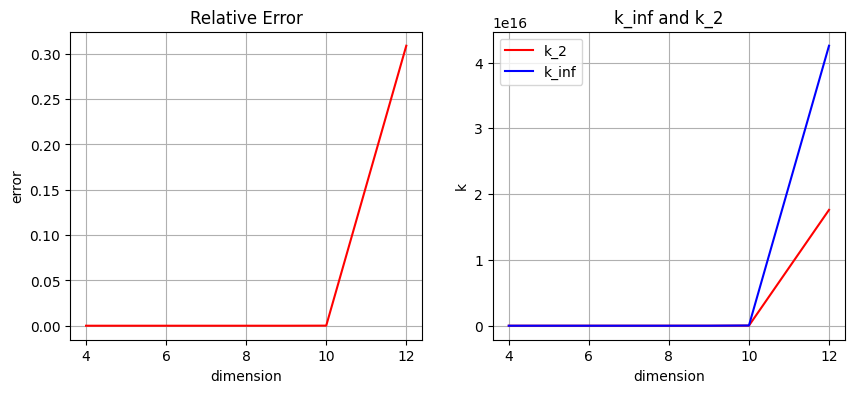

In [12]:

dim3=np.linspace(4,12,8,dtype=int)
analysis(dim3,vecMatricx(dim3,"Hilbert"))